In [2]:
import torch
import cv2

def load_video_to_tensor(video_path: str) -> torch.Tensor:
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Create an empty list to store the frames
    frames = []

    # Read frames until the video is complete
    while video.isOpened():
        # Read the current frame
        ret, frame = video.read()

        # If the frame is not read successfully, break the loop
        if not ret:
            break

        # Convert the frame to RGB format (assuming BGR format from OpenCV)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Convert the frame to a PyTorch tensor
        frame_tensor = torch.from_numpy(frame_rgb)

        # Append the frame tensor to the list
        frames.append(frame_tensor)

    # Close the video file
    video.release()

    # Stack all the frames in the list along the time dimension
    video_tensor = torch.stack(frames)

    return video_tensor

def print_size(video_tensor: torch.Tensor):
    print(f"size: {video_tensor.element_size() * video_tensor.nelement() / 1024 / 1024} MB")

In [3]:
import matplotlib.pyplot as plt
import pytorchvideo.transforms as ptv_transforms
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
from einops import rearrange
import numpy as np

num_file = 10
frame_to_show = 150
f, axarr = plt.subplots(num_file, 2)

for i in range(num_file):
    if i < 5:
        continue
    video = load_video_to_tensor(video_path=f"custom_dataset/{i+1}.mp4")
    axarr[i, 0].imshow(video[frame_to_show].numpy())
    print(video.shape)
    print_size(video)

    transform = transforms.Compose([
        ptv_transforms.RandomResizedCrop(256, 256, scale=(0.5, 1.0), aspect_ratio=(3/4, 4/3)),
    ])

    video_crop_random = video.permute(3, 0, 1, 2)
    video_crop_random = transform(video_crop_random)
    video_crop_random = video_crop_random.permute(1, 2, 3, 0)
    axarr[i, 1].imshow(video_crop_random[frame_to_show].numpy())
    print(video_crop_random.shape)
    print_size(video_crop_random)

    pca = PCA()
    video_crop_random_pca = rearrange(video_crop_random, 't h w c -> (h w c) t')
    cumulative_explained_variance = pca.fit(video_crop_random_pca).explained_variance_ratio_.cumsum()
    with open(f'custom_dataset/{i+1}.npy', 'wb') as f:
        np.save(f, cumulative_explained_variance)
        
plt.show()

KeyboardInterrupt: 

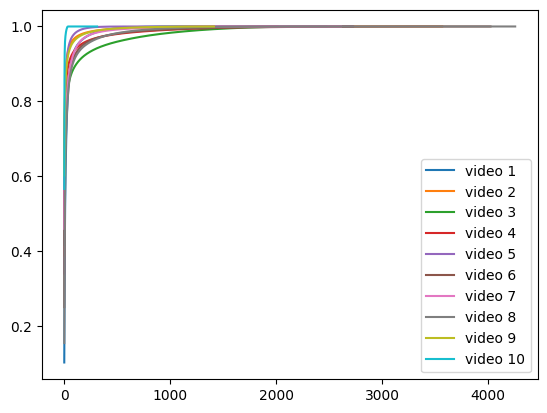

In [3]:
import matplotlib.pyplot as plt
import numpy as np

num_file = 10

cumulative_explained_variances = []
for i in range(num_file):
    cumulative_explained_variance = np.load(f'../custom_dataset/{i+1}.npy')
    plt.plot(cumulative_explained_variance)
    cumulative_explained_variances.append(cumulative_explained_variance)
    
plt.legend([f'video {i+1}' for i in range(num_file)])
    
plt.show()

In [9]:
pair80 = []
pair85 = []
pair90 = []
pair95 = []
pair97 = []
var80 = []
var85 = []
var90 = []
var95 = []
var97 = []

for variance in cumulative_explained_variances:
    # if variance[n] > 0.95, check n / frame
    found80 = False
    found85 = False
    found90 = False
    found95 = False
    found97 = False
    for i, v in enumerate(variance):
        if v > 0.80 and not found80:
            pair80.append((i, len(variance)))
            var80.append(i/len(variance))
            found80 = True
        if v > 0.85 and not found85:
            pair85.append((i, len(variance)))
            var85.append(i/len(variance))
            found85 = True
        if v > 0.90 and not found90:
            pair90.append((i, len(variance)))
            var90.append(i/len(variance))
            found90 = True
        if v > 0.95 and not found95:
            pair95.append((i, len(variance)))
            var95.append(i/len(variance))
            found95 = True
        if v > 0.97 and not found97:
            pair97.append((i, len(variance)))
            var97.append(i/len(variance))
            found97 = True

[(63, 2728), (19, 3568), (115, 2475), (41, 2015), (21, 2725), (68, 4024), (62, 2612), (80, 4257), (25, 1414), (3, 311)]


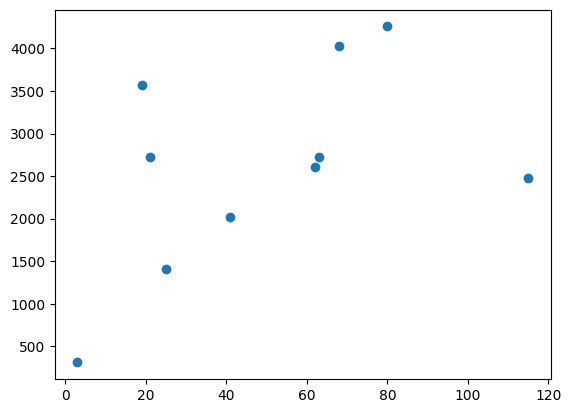

In [16]:
print(pair90)
plt.scatter([x[0] for x in pair90], [x[1] for x in pair90])
plt.show()

In [ ]:
var80 = np.array(var80)
var85 = np.array(var85)
var90 = np.array(var90)
var95 = np.array(var95)
var97 = np.array(var97)

print(f"mean: {np.average(var80)}, std: {np.std(var80)}")
print(f"mean: {np.average(var85)}, std: {np.std(var85)}")
print(f"mean: {np.average(var90)}, std: {np.std(var90)}")
print(f"mean: {np.average(var95)}, std: {np.std(var95)}")
print(f"mean: {np.average(var97)}, std: {np.std(var97)}")

mean: 0.006139359276004147, std: 0.0028296768038245847
mean: 0.009813163093609906, std: 0.004568431340920946
mean: 0.018969184407540272, std: 0.010970629893187972
mean: 0.05090770656263767, std: 0.03875148972485694
mean: 0.09031523440974176, std: 0.07034432681215998


In [ ]:
print(1/np.average(var80))
print(1/np.average(var85))
print(1/np.average(var90))
print(1/np.average(var95))
print(1/np.average(var97))

162.88344679688763
101.90394172203005
52.71707937018625
19.643391296160313
11.072329120724023


In [ ]:
var80 = (var80 - np.min(var80)) / (np.max(var80) - np.min(var80))
var85 = (var85 - np.min(var85)) / (np.max(var85) - np.min(var85))
var90 = (var90 - np.min(var90)) / (np.max(var90) - np.min(var90))
var95 = (var95 - np.min(var95)) / (np.max(var95) - np.min(var95))
var97 = (var97 - np.min(var97)) / (np.max(var97) - np.min(var97))

print(f"mean: {np.average(var80)}, std: {np.std(var80)}")
print(f"mean: {np.average(var85)}, std: {np.std(var85)}")
print(f"mean: {np.average(var90)}, std: {np.std(var90)}")
print(f"mean: {np.average(var95)}, std: {np.std(var95)}")
print(f"mean: {np.average(var97)}, std: {np.std(var97)}")

mean: 0.4436189071489395, std: 0.2815993629226015
mean: 0.4681423499875256, std: 0.3050687639736596
mean: 0.33165354234466937, std: 0.2666687910947421
mean: 0.25697898691647814, std: 0.2762098924015237
mean: 0.2620354749742709, std: 0.2852161351110746
